In [ ]:
from sklearn.exceptions import UndefinedMetricWarning
import numpy as np 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

In [ ]:
DATADIR = "/content/drive/MyDrive/images"
categories = ["mattar_paneer","Beetroot_Halwa","bhindi_fry", "chicken_biryani", "chicken_lollipop",
              "dal_makhani", "Egg_Burji", "jalebi", "jeera_aloo", "kaju_katli", 
              "Palak_Paneer", "Parotta", "poori", "rasgulla", "vada"]
training_data = []
def create_train():
    for cat in categories:
        path = os.path.join(DATADIR,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_a = load_img(os.path.join(DATADIR,cat,img))
                img_array = img_to_array(img_a)
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
create_train()
X = []
y = []
for feat,label in training_data:
    X.append(feat)
    y.append(label)
X = np.array(X)
X/=255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [ ]:
model1 = load_model("Zirpy73_actual.h5")
model2 = load_model("62perc.h5")
model3 = load_model("adadelta.h5")

Optimal Model


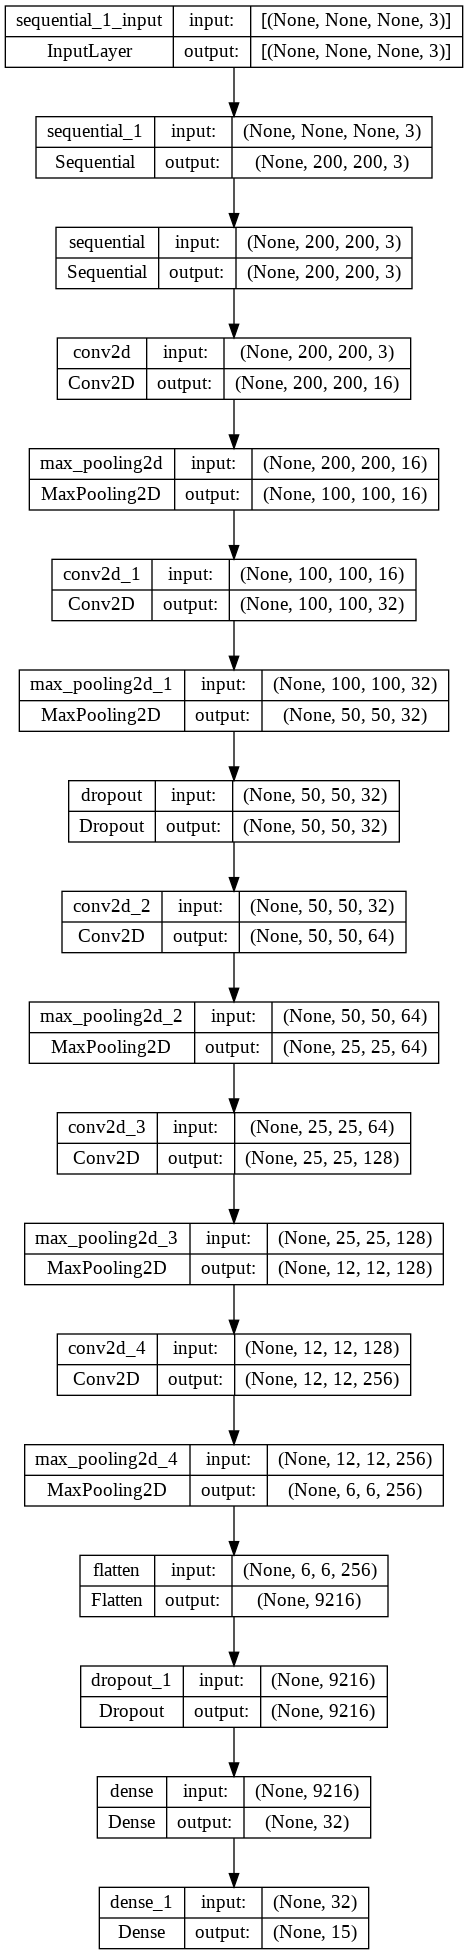

In [ ]:
print("Optimal Model")
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

Bad Accuracy Model


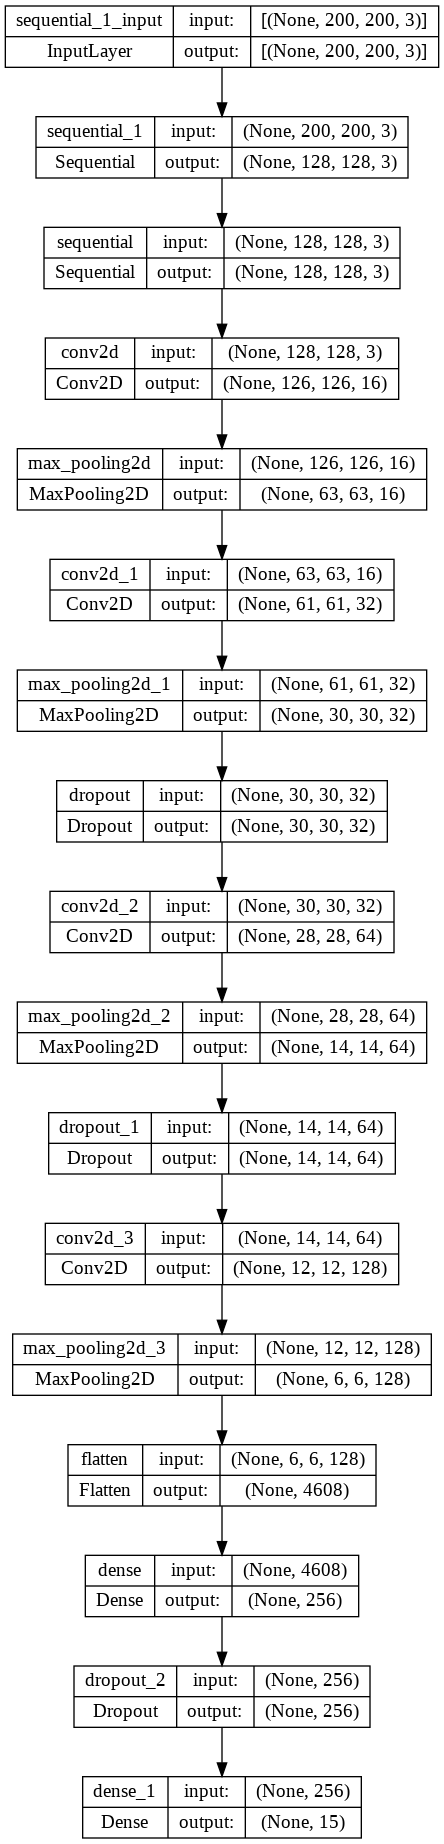

In [ ]:
print("Bad Accuracy Model")
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

Adadelta Model


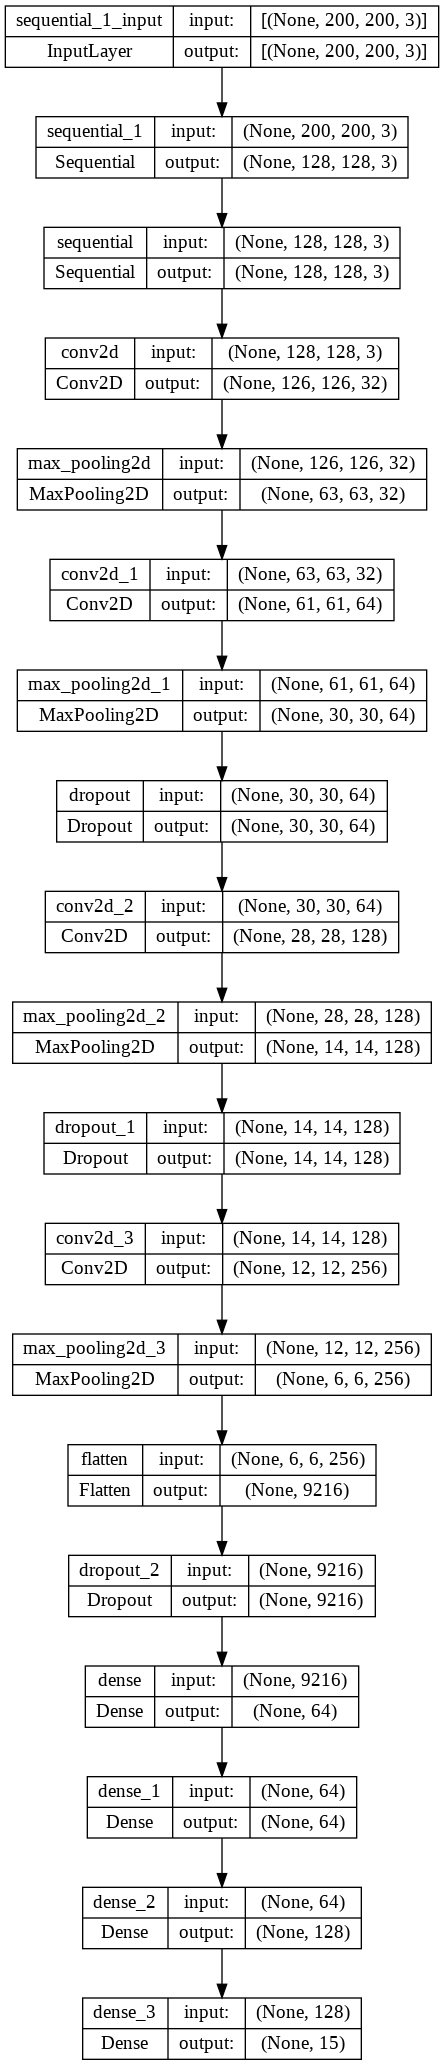

In [ ]:
print("Adadelta Model")
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

14/14 [==============================] - 6s 410ms/step
0.8934226494356511


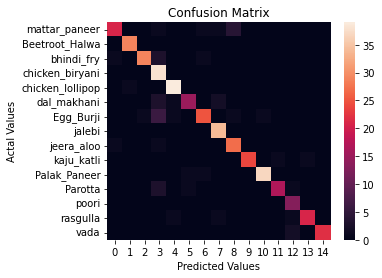

,Precision,Recall,F-Score,Support
mattar_paneer,0.913043,0.750000,0.823529,28
Beetroot_Halwa,0.966667,1.000000,0.983051,29
bhindi_fry,0.966667,0.852941,0.906250,34
chicken_biryani,0.690909,1.000000,0.817204,38
chicken_lollipop,0.928571,0.975000,0.951220,40
dal_makhani,0.882353,0.714286,0.789474,21
Egg_Burji,0.892857,0.714286,0.793651,35
jalebi,0.894737,1.000000,0.944444,34
jeera_aloo,0.843750,0.931034,0.885246,29
kaju_katli,1.000000,0.923077,0.960000,26


In [ ]:
y_pred = np.argmax(model1.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=False)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
prec = []
rec = []
fs = []
sup = []
for i in range(len(categories)):
  prec.append(precision_recall_fscore_support(y_test, y_pred)[0][i])
  rec.append(precision_recall_fscore_support(y_test, y_pred)[1][i])
  fs.append(precision_recall_fscore_support(y_test, y_pred)[2][i])
  sup.append(precision_recall_fscore_support(y_test, y_pred)[3][i])
dic = {"Precision":prec, "Recall":rec, "F-Score":fs, "Support":sup}
df = pd.DataFrame(dic, index=categories)
df

14/14 [==============================] - 2s 143ms/step
0.7322082940080273


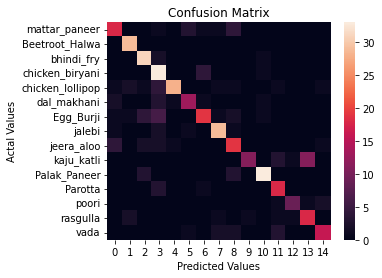

,Precision,Recall,F-Score,Support
mattar_paneer,0.666667,0.642857,0.654545,28
Beetroot_Halwa,0.852941,1.000000,0.920635,29
bhindi_fry,0.756098,0.911765,0.826667,34
chicken_biryani,0.589286,0.868421,0.702128,38
chicken_lollipop,0.933333,0.700000,0.800000,40
dal_makhani,0.722222,0.619048,0.666667,21
Egg_Burji,0.730769,0.542857,0.622951,35
jalebi,0.828571,0.852941,0.840580,34
jeera_aloo,0.593750,0.655172,0.622951,29
kaju_katli,0.916667,0.423077,0.578947,26


In [ ]:
y_pred2 = np.argmax(model2.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred2, average="macro"))
cm1 = confusion_matrix(y_test, y_pred2)
cm_df1 = pd.DataFrame(cm1, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df1, annot=False)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
prec1 = []
rec1 = []
fs1 = []
sup1 = []
for i in range(len(categories)):
  prec1.append(precision_recall_fscore_support(y_test, y_pred2)[0][i])
  rec1.append(precision_recall_fscore_support(y_test, y_pred2)[1][i])
  fs1.append(precision_recall_fscore_support(y_test, y_pred2)[2][i])
  sup1.append(precision_recall_fscore_support(y_test, y_pred2)[3][i])
dic1 = {"Precision":prec1, "Recall":rec1, "F-Score":fs1, "Support":sup1}
df1 = pd.DataFrame(dic1, index=categories)
df1

14/14 [==============================] - 4s 279ms/step
0.01068917018284107


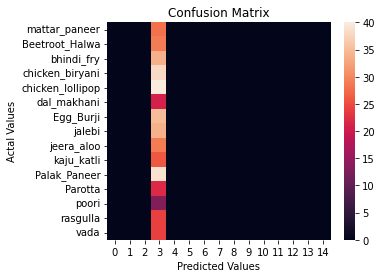

,Precision,Recall,F-Score,Support
mattar_paneer,0.000000,0.0,0.000000,28
Beetroot_Halwa,0.000000,0.0,0.000000,29
bhindi_fry,0.000000,0.0,0.000000,34
chicken_biryani,0.087156,1.0,0.160338,38
chicken_lollipop,0.000000,0.0,0.000000,40
dal_makhani,0.000000,0.0,0.000000,21
Egg_Burji,0.000000,0.0,0.000000,35
jalebi,0.000000,0.0,0.000000,34
jeera_aloo,0.000000,0.0,0.000000,29
kaju_katli,0.000000,0.0,0.000000,26


In [ ]:
y_pred3 = np.argmax(model3.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred3, average="macro"))
cm2 = confusion_matrix(y_test, y_pred3)
cm_df2 = pd.DataFrame(cm2, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=False)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
prec2 = []
rec2 = []
fs2 = []
sup2 = []
for i in range(len(categories)):
  prec2.append(precision_recall_fscore_support(y_test, y_pred3)[0][i])
  rec2.append(precision_recall_fscore_support(y_test, y_pred3)[1][i])
  fs2.append(precision_recall_fscore_support(y_test, y_pred3)[2][i])
  sup2.append(precision_recall_fscore_support(y_test, y_pred3)[3][i])
dic2 = {"Precision":prec2, "Recall":rec2, "F-Score":fs2, "Support":sup2}
df2 = pd.DataFrame(dic2, index=categories)
df2